In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the training and testing datasets
TR_INPUT = pd.read_csv('C:\\Users\\PC\\Desktop\\spambase_train.csv')
TS_INPUT = pd.read_csv('C:\\Users\\PC\\Desktop\\spambase_test.csv')

In [3]:
# Prepare the data
X_traininggg = TR_INPUT.drop(columns=['ID', 'spam'])
Y_traininggg = TR_INPUT['spam']
X_testinggg = TS_INPUT.drop(columns=['ID'])

In [4]:
# Scale the features
scaler = StandardScaler()
X_traininggg_scaled = scaler.fit_transform(X_traininggg)
X_testinggg_scaled = scaler.transform(X_testinggg)

In [5]:
# Initialize the SVM model
style = SVC(kernel='rbf', C=2.0, gamma='scale', random_state=43)
style.fit(X_traininggg_scaled, Y_traininggg)

SVC(C=2.0, random_state=43)

In [6]:
# Predict on testing data
Y_pred = style.predict(X_testinggg_scaled)

In [7]:
# Create a DataFrame for submission
hm_submission = pd.DataFrame({'ID': TS_INPUT['ID'], 'spam': Y_pred})

In [8]:
# Save the result to CSV
output_file_name = 'svm_results.csv'
hm_submission.to_csv(output_file_name, index=False)
print(f"Results saved to {output_file_name}")

Results saved to svm_results.csv


In [9]:
# Evaluate the model on training data
Y_traininggg_pred = style.predict(X_traininggg_scaled)
train_accuracy = accuracy_score(Y_traininggg, Y_traininggg_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9555900621118012


In [10]:
# Print classification report
train_class_report = classification_report(Y_traininggg, Y_traininggg_pred)
print("Classification Report on Training Data:\n", train_class_report)

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1951
           1       0.96      0.93      0.94      1269

    accuracy                           0.96      3220
   macro avg       0.96      0.95      0.95      3220
weighted avg       0.96      0.96      0.96      3220



In [11]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_traininggg, Y_traininggg_pred)

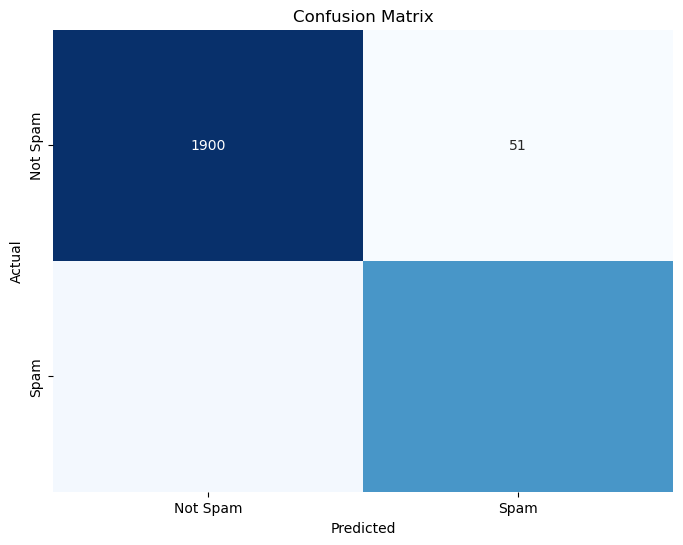

In [12]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_traininggg, style.decision_function(X_traininggg_scaled))

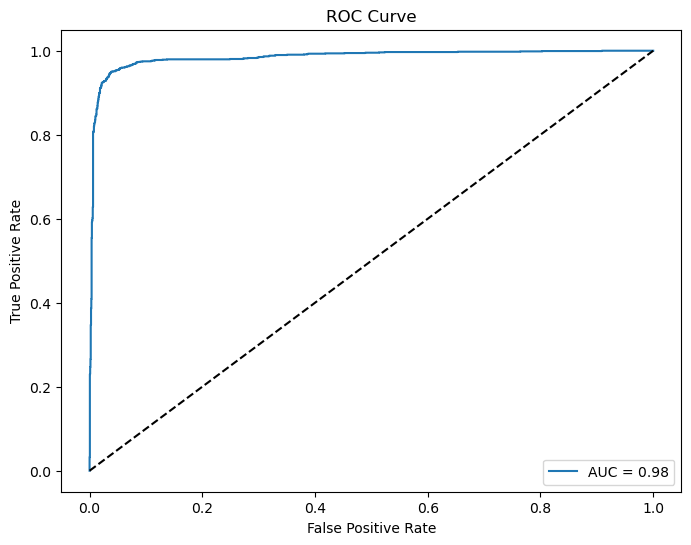

In [14]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(Y_traininggg, style.decision_function(X_traininggg_scaled)):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()